In [18]:
import numpy as np
import pyedflib
import statistics
import plotly.graph_objects as go
import pandas as pd
from gtda.time_series import SingleTakensEmbedding
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy, Amplitude, NumberOfPoints, ComplexPolynomial, PersistenceLandscape, HeatKernel, Silhouette, BettiCurve, PairwiseDistance, ForgetDimension
from gtda.plotting import plot_point_cloud, plot_heatmap, plot_diagram
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, FastICA
from gtda.pipeline import Pipeline 

In [105]:
shortened_diagrams1 = np.load("Shortened_PD1.npy", allow_pickle=True)
shortened_diagrams3 = np.load("Shortened_PD3.npy", allow_pickle=True)
shortened_diagrams5 = np.load("Shortened_PD5.npy", allow_pickle=True)

Also here, we first have to split into training and test set

# HeatKernel

In a way, the Heat Kernel shows an "average distribution" of the persistence diagrams for each label, seperated per hole dimensionality.

In [106]:
HK = HeatKernel(sigma=0.00003, n_bins=100)

### Label 1

In [107]:
label1_kernel_intensity_dim0 = []
label1_kernel_intensity_dim1 = []
label1_kernel_intensity_dim2 = []

for diagram in shortened_diagrams1:
    heatkernel = HK.fit_transform([diagram])
    label1_kernel_intensity_dim0.append(heatkernel[0][0].var())
    label1_kernel_intensity_dim1.append(heatkernel[0][1].var())
    label1_kernel_intensity_dim2.append(heatkernel[0][2].var())

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/gtda/utils/validation.py:19: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/gtda/utils/validation.py:19: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/gtda/utils/validation.py:19: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (

### Label 3

In [108]:
label3_kernel_intensity_dim0 = []
label3_kernel_intensity_dim1 = []
label3_kernel_intensity_dim2 = []

for diagram in shortened_diagrams3:
    heatkernel = HK.fit_transform([diagram])
    label3_kernel_intensity_dim0.append(heatkernel[0][0].var())
    label3_kernel_intensity_dim1.append(heatkernel[0][1].var())
    label3_kernel_intensity_dim2.append(heatkernel[0][2].var())

# Preliminary because we removed one diagram before
label3_kernel_intensity_dim0.append(heatkernel[0][0].var())
label3_kernel_intensity_dim1.append(heatkernel[0][1].var())
label3_kernel_intensity_dim2.append(heatkernel[0][2].var())


/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/gtda/utils/validation.py:19: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/gtda/utils/validation.py:19: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/gtda/utils/validation.py:19: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (

### Label 5

In [109]:
label5_kernel_intensity_dim0 = []
label5_kernel_intensity_dim1 = []
label5_kernel_intensity_dim2 = []

for diagram in shortened_diagrams5:
    heatkernel = HK.fit_transform([diagram])
    label5_kernel_intensity_dim0.append(heatkernel[0][0].var())
    label5_kernel_intensity_dim1.append(heatkernel[0][1].var())
    label5_kernel_intensity_dim2.append(heatkernel[0][2].var())

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/gtda/utils/validation.py:19: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/gtda/utils/validation.py:19: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/gtda/utils/validation.py:19: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (

### Save Intensities

In [110]:
feature_df1 = pd.DataFrame()

feature_df1["Kernel_Intensity_Dim0"] = label1_kernel_intensity_dim0
feature_df1["Kernel_Intensity_Dim1"] = label1_kernel_intensity_dim1
feature_df1["Kernel_Intensity_Dim2"] = label1_kernel_intensity_dim2
feature_df1["Label"] = 1

In [111]:
feature_df3 = pd.DataFrame()

feature_df3["Kernel_Intensity_Dim0"] = label3_kernel_intensity_dim0
feature_df3["Kernel_Intensity_Dim1"] = label3_kernel_intensity_dim1
feature_df3["Kernel_Intensity_Dim2"] = label3_kernel_intensity_dim2
feature_df3["Label"] = 3

In [112]:
feature_df5 = pd.DataFrame()

feature_df5["Kernel_Intensity_Dim0"] = label5_kernel_intensity_dim0
feature_df5["Kernel_Intensity_Dim1"] = label5_kernel_intensity_dim1
feature_df5["Kernel_Intensity_Dim2"] = label5_kernel_intensity_dim2
feature_df5["Label"] = 5

In [113]:
feature_df = pd.concat([feature_df1, feature_df3, feature_df5])

In [115]:
feature_df.to_csv("More_Features.csv")

# Persistance Landscape

In [ ]:
PL = PersistenceLandscape()

Label 1

Persistence landscapes map persistence diagrams into a function space, which may often be taken to be a Banach space or even a Hilbert space

In [ ]:
persistence_landscape = PL.fit_transform(shortened_diagrams1)

PL.plot(persistence_landscape)

Label 3

In [ ]:
persistence_landscape = PL.fit_transform(shortened_diagrams3)

PL.plot(persistence_landscape)

Label 5

In [ ]:
persistence_landscape = PL.fit_transform(shortened_diagrams5)

PL.plot(persistence_landscape)

## Silhouette

I calculated an overall silhouette for all labels together.

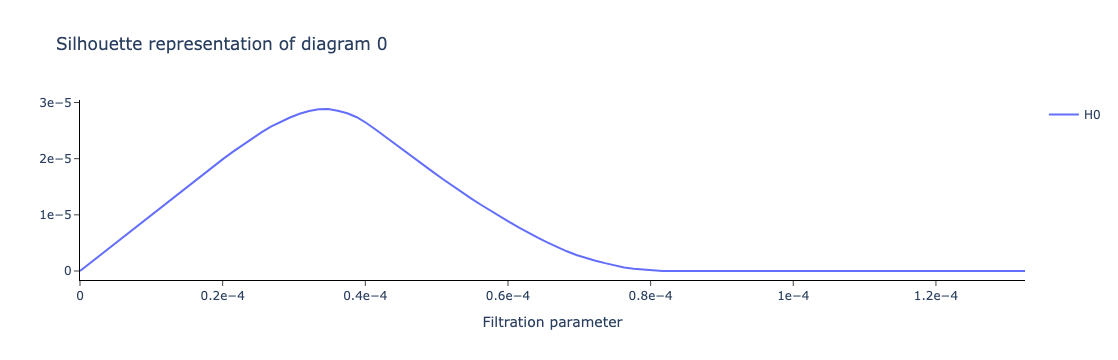

In [83]:
SH = Silhouette()

silhouette = SH.fit_transform(shortened_diagrams1)

SH.plot(silhouette, homology_dimensions = [0])

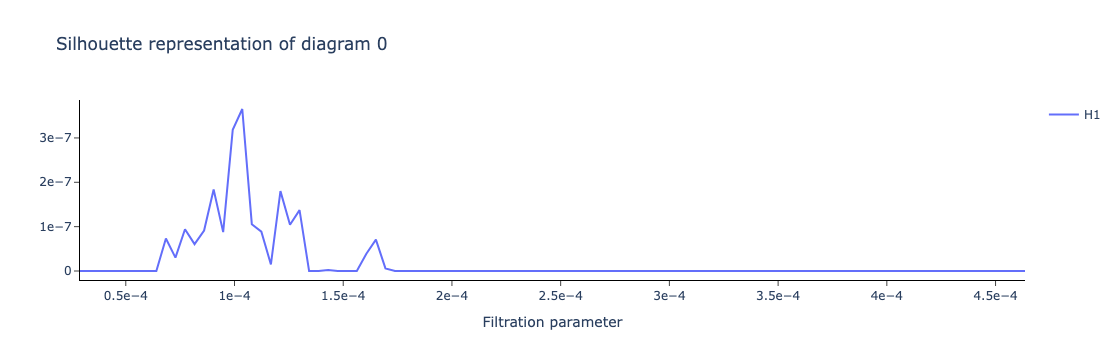

In [84]:
SH.plot(silhouette, homology_dimensions = [1])

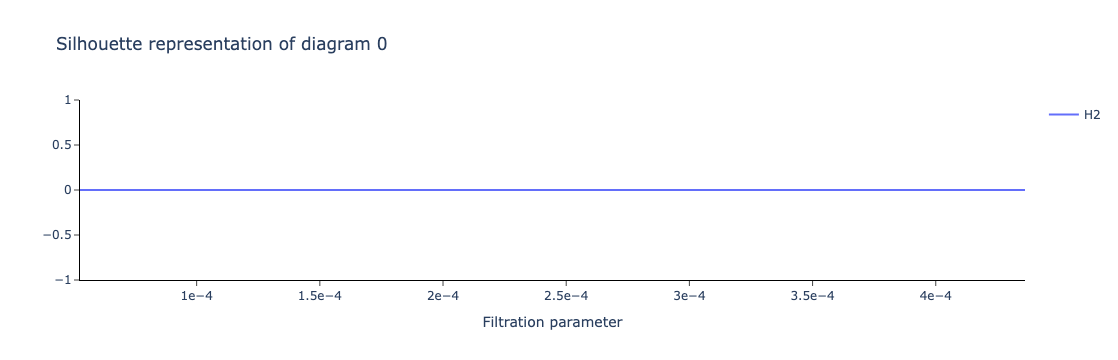

In [85]:
SH.plot(silhouette, homology_dimensions = [2])

## Scatter plots

This is mainly for fun. It'is an example scatter plot for showing dependencies between the number of holes of different dimensions in a persistence diagram. 

In [ ]:
plt.scatter(z1, y1)
plt.show()

In [ ]:
plt.scatter(z3, y3)
plt.show()

The numbers of tunnels and voids are positively correlated.

# Global Approach

In [ ]:
# Merge Together all segments with the same label
grouped_segments = {label: [] for label in {1, 2, 3, 4, 5, 7}}

# Group segments based on labels
for segment, label in zip(eeg_segments, labels):
    grouped_segments[label].extend(segment)

# Create merged lists for each label
merged_lists = {label: merged_segment for label, merged_segment in grouped_segments.items()}

## PCA Point Cloud

In [ ]:
data = []
data.extend(merged_lists[1])
data.extend(merged_lists[3])
data.extend(merged_lists[4])

global_y_embedded = embedder_periodic.fit_transform(data[:10000])

# Apply dimensionality PCA to project down to 3-dimensions for visualisation:
pca = PCA(n_components=3)
y_embedded_pca = pca.fit_transform(global_y_embedded)
plot_point_cloud(y_embedded_pca)

There are no clusters or similar visible here

In [ ]:
global_y_embedded1 = embedder_periodic.fit_transform(merged_lists[1][:10000])
global_y_embedded3 = embedder_periodic.fit_transform(merged_lists[3][:10000])
global_y_embedded5 = embedder_periodic.fit_transform(merged_lists[5][:10000])


## Persistence Diagrams

Label 1

In [ ]:
# Persistance Diagram for the whole data labelled with 1 (or rather first 10,000 entries)
global_diagram1 = persistence.fit_transform_plot(global_y_embedded1[None, :, :])
global_persistence_entropy1 = PE.fit_transform(global_diagram1)
global_amplitude1  = AM.fit_transform(global_diagram1)
global_no_points1  = NP.fit_transform(global_diagram1)
global_complex_polynomial1  = CP.fit_transform(global_diagram1)

print("Features for dimensions 0, 1, 2:")
print("")
print("Persistence Entropies: " + str(global_persistence_entropy1))
print("Amplitudes: " + str(global_amplitude1))
print("Numbers of Points: " + str(global_no_points1))
#print("Complex Polynomials: " + str(global_complex_polynomial1))

Label 3

In [ ]:
# Persistance Diagram for the whole data labelled with 3 (or rather first 10,000 entries)
y_embedded = global_y_embedded3[None, :, :]

global_diagram3 = persistence.fit_transform_plot(y_embedded)

global_persistence_entropy3 = PE.fit_transform(global_diagram3)
global_amplitude3  = AM.fit_transform(global_diagram3)
global_no_points3  = NP.fit_transform(global_diagram3)
global_complex_polynomial3  = CP.fit_transform(global_diagram3)

print("Features for dimensions 0, 1, 2:")
print("")
print("Persistence Entropies: " + str(global_persistence_entropy3))
print("Amplitudes: " + str(global_amplitude3))
print("Numbers of Points: " + str(global_no_points3))
#print("Complex Polynomials: " + str(global_complex_polynomial3))

In [ ]:
# Persistance Diagram for the whole data labelled with 4 (or rather first 10,000 entries)
y_embedded = global_y_embedded5[None, :, :]

global_diagram4 = persistence.fit_transform_plot(y_embedded)

global_persistence_entropy4 = PE.fit_transform(global_diagram4)
global_amplitude4  = AM.fit_transform(global_diagram4)
global_no_points4  = NP.fit_transform(global_diagram4)
global_complex_polynomial4  = CP.fit_transform(global_diagram4)

print("Features for dimensions 0, 1, 2:")
print("")
print("Persistence Entropies: " + str(global_persistence_entropy4))
print("Amplitudes: " + str(global_amplitude4))
print("Numbers of Points: " + str(global_no_points4))
#print("Complex Polynomials: " + str(global_complex_polynomial3))

#### Analysis 
- They visually look different, but also have different scales
- The amplitude (especially of connectivities) for label 1 is much lower than for the other two labels
-  Label 3 also has relatively few voids, label 1 has the most voids (which is also visible in the "Number of Points" plot in the Local Analyis)

## Persistence Landscape

In [ ]:
PL = PersistenceLandscape()


In [ ]:
# Persistence landscape for label 1

persistence_landscape = PL.fit_transform(global_diagram1)

PL.plot(persistence_landscape)

In [ ]:
# Persistence landscape for label 3

persistence_landscape = PL.fit_transform(global_diagram3)

PL.plot(persistence_landscape)

In [ ]:
# Persistence landscape for label 4

persistence_landscape = PL.fit_transform(global_diagram4)

PL.plot(persistence_landscape)

# Experiments

## Experiments with PCA & ICA

Comparing the three approaches for the noisy level 4

- Using an Embedding dimension of 5 and reducing the space to 3D with PCA
- Using an Embedding dimension of 5 and reducing the space to 3D with ICA
- Using an Embedding dimension of 3 directly

In [ ]:
# Without PCA
embedding_dimension= 3
embedding_time_delay = 25
stride = 10

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay,
    dimension=embedding_dimension,
    stride=stride,
)

y_embedded_without_pca = embedder_periodic.fit_transform(merged_lists[4][:10000])

plot_point_cloud(y_embedded_without_pca)

In [ ]:
# PCA

embedding_dimension= 5 # dimension 7 instead of 5
embedding_time_delay = 25
stride = 10

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay,
    dimension=embedding_dimension,
    stride=stride,
)

y_embedded = embedder_periodic.fit_transform(merged_lists[4][:10000])

pca = PCA(n_components=3)
y_embedded_pca = pca.fit_transform(y_embedded)
plot_point_cloud(y_embedded_pca)

In [ ]:
# ICA

embedding_dimension= 5 # dimension 7 instead of 5
embedding_time_delay = 25
stride = 10

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay,
    dimension=embedding_dimension,
    stride=stride,
)

y_embedded = embedder_periodic.fit_transform(merged_lists[4][:10000])

pca = FastICA(n_components=3)
y_embedded_ica = pca.fit_transform(y_embedded)
plot_point_cloud(y_embedded_ica)

In [ ]:
def max_distance(points):
  n_points = points.shape[0]
  max_distance = 0
  for i in range(n_points):
    for j in range(i + 1, n_points):
      distance = np.linalg.norm(points[i] - points[j])
      if distance > max_distance:
        max_distance = distance

  return max_distance

print(max_distance(y_embedded_without_pca))
print(max_distance(y_embedded_pca))
print(max_distance(y_embedded_ica))

In the PCA approach, the point cloud looks "rounder", so there is not one primary component. They have a similar amount of outliers, but the outliers in the PCA approach are more equally distributed. What happens if I plot the persistence diagram?

In [ ]:
# Persistance Diagram for approach without PCA
y_embedded = y_embedded_without_pca[None, :, :]

diagram_without_pca = persistence.fit_transform_plot(y_embedded)

In [ ]:
# Persistance Diagram for approach with PCA
y_embedded = y_embedded_pca[None, :, :]

diagram_with_pca = persistence.fit_transform_plot(y_embedded)

In [ ]:
# Persistance Diagram for approach with PCA
y_embedded = y_embedded_ica[None, :, :]

diagram_with_ica = persistence.fit_transform_plot(y_embedded)

Overall, PCA and ICA probably do not add much value here.

## Visualizing Vietoris-Rips complexes

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Generate example point embedding
# Define the radius for Vietoris-Rips complex
radius = 0.38e-4 # ideal value for 0 dimensional holes
radius = 0.65e-4 # ideal value for 1 dimensional holes
radius = 1.1e-4 # ideal value for 2 dimensional holes

points = global_y_embedded
num_points = len(points)
# Calculate pairwise distances between points
distances = euclidean_distances(points)

# Create a NetworkX graph for the Vietoris-Rips complex
G = nx.Graph()

# Add vertices (nodes) to the graph
for i in range(num_points):
    G.add_node(i, pos=(points[i, 0], points[i, 1]))

# Add edges based on the distance matrix and radius
for i in range(num_points):
    for j in range(i + 1, num_points):
        if distances[i, j] <= radius:
            G.add_edge(i, j)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=8)
plt.title("Vietoris-Rips Complex Visualization")
plt.show()


## Experimental Code

In [ ]:
# If I add the labels to the DataFrame data as a column target, this is a fancy way of
# Retrieving different datasets for each label

data = {
    "x": [1, 2, 3, 4, 5, 6],
    "y": [10, 20, 30, 40, 50, 60],
    "z": [100, 200, 300, 400, 500, 600],
    "target": ["A", "B", "A", "C", "B", "C"]
}
df = pd.DataFrame(data)

# Calculate point_clouds
point_clouds = np.asarray(
    [
        df.query("target == @shape")[["x", "y", "z"]].values
        for shape in df["target"].unique()
    ]
)